 # Machine Learning Day 2 Lab 


**1.Sarah is a botanist who studies different species of plants. She is particularly interested in the Iris genus and has collected data on the sepal length, sepal width, petal length, and petal width of various Iris flowers. She wants to use this data to classify the flowers into their respective species based on their physical characteristics. Sarah decides to use a machine learning algorithm for this task and trains a model on her collected data. The algorithm uses the sepal and petal measurements as input features and predicts the species of the flower based on these features. One day, Sarah is out in the field collecting new samples of Iris flowers. She measures the sepal and petal characteristics of each flower and inputs this information into the trained model. The model then predicts the species of each flower based on its physical characteristics.**

a)	Read the IRIS.csv Data set using the Pandas module 

b)	Plot the data using a scatter plot   "sepal_width" versus "sepal_length" and color species.
c)	Split the data

d)	Fit the data to the model

e)	Predict the model with new test data [5,  3 ,   1,   .3]


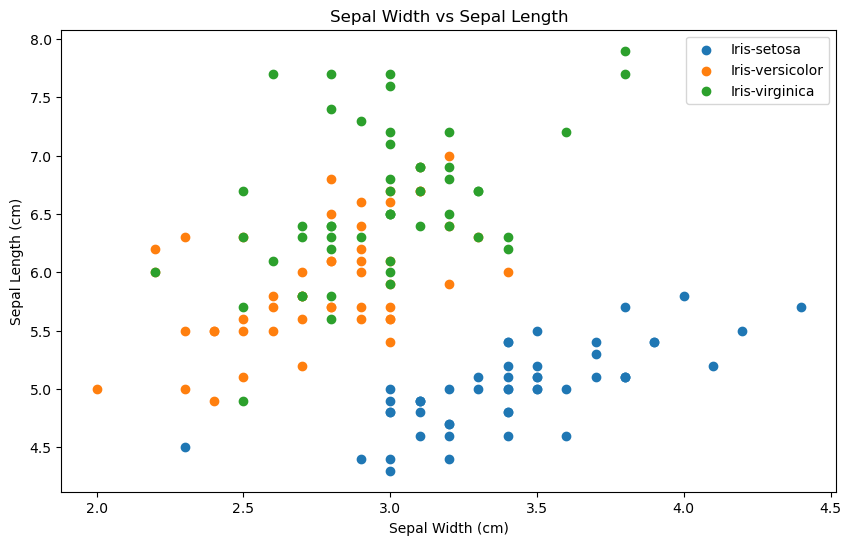

The predicted species for the test data [5, 3, 1, 0.3] is: Iris-setosa


/Users/sunilshurajnthiyanandan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# a) Read the IRIS.csv Data set using the Pandas module
df = pd.read_csv('/Users/sunilshurajnthiyanandan/Documents/sunil_clg/machine_Learning/Data/Iris.csv')

# b) Plot the data using a scatter plot "sepal_width" versus "sepal_length" and color species
plt.figure(figsize=(10, 6))
for species in df['Species'].unique():
    subset = df[df['Species'] == species]
    plt.scatter(subset['SepalWidthCm'], subset['SepalLengthCm'], label=species)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Sepal Length (cm)')
plt.legend()
plt.title('Sepal Width vs Sepal Length')
plt.show()

# c) Split the data
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# d) Fit the data to the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# e) Predict the model with new test data [5, 3, 1, 0.3]
test_data = [[5, 3, 1, 0.3]]
prediction = model.predict(test_data)
print(f'The predicted species for the test data [5, 3, 1, 0.3] is: {prediction[0]}')

**2.For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.**

Example	Sky	Air Temp	Humidity	Wind	Water	Forecast	Enjoy Sport

1	  Sunny	  Warm	  Normal	  Strong	Warm	Same	     Yes
 
2	  Sunny	  Warm	  High	     Strong	    Warm	Same	     Yes
 
3	  Rainy	  Cold	  High	    Strong	    Warm	Change	     No

4	  Sunny	  Warm	  High	    Strong	    Cool	Change	     Yes


In [2]:
import pandas as pd

# Create the dataset using a DataFrame
data = {
    'Example': [1, 2, 3, 4],
    'Sky': ['Sunny', 'Sunny', 'Rainy', 'Sunny'],
    'Air Temp': ['Warm', 'Warm', 'Cold', 'Warm'],
    'Humidity': ['Normal', 'High', 'High', 'High'],
    'Wind': ['Strong', 'Strong', 'Strong', 'Strong'],
    'Water': ['Warm', 'Warm', 'Warm', 'Cool'],
    'Forecast': ['Same', 'Same', 'Change', 'Change'],
    'Enjoy Sport': ['Yes', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)

# Drop the 'Example' column as it is not a feature
df.drop(columns=['Example'], inplace=True)

# Function to initialize the specific and general hypotheses
def initialize_hypotheses(num_attributes):
    specific_h = ['0'] * num_attributes
    general_h = [['?' for _ in range(num_attributes)]]
    return specific_h, general_h

# Function to update the specific hypothesis
def update_specific_h(specific_h, instance):
    for i in range(len(specific_h)):
        if specific_h[i] == '0':
            specific_h[i] = instance[i]
        elif specific_h[i] != instance[i]:
            specific_h[i] = '?'
    return specific_h

# Function to update the general hypotheses
def update_general_h(general_h, specific_h, instance):
    new_general_h = []
    for hypothesis in general_h:
        consistent = True
        for i in range(len(hypothesis)):
            if hypothesis[i] != '?' and hypothesis[i] != instance[i]:
                consistent = False
                break
        if consistent:
            new_general_h.append(hypothesis)
        else:
            for i in range(len(hypothesis)):
                if hypothesis[i] == '?' and specific_h[i] != '?':
                    new_hypothesis = hypothesis[:]
                    new_hypothesis[i] = specific_h[i]
                    if new_hypothesis not in new_general_h:
                        new_general_h.append(new_hypothesis)
    return new_general_h

# Get the attributes and target values
attributes = df.columns[:-1]
target = df.columns[-1]

# Initialize hypotheses
specific_h, general_h = initialize_hypotheses(len(attributes))

# Iterate through the training examples
for index, row in df.iterrows():
    if row[target] == 'Yes':
        specific_h = update_specific_h(specific_h, row[:-1])
        general_h = [h for h in general_h if all(h[i] == '?' or h[i] == specific_h[i] for i in range(len(h)))]
    elif row[target] == 'No':
        general_h = update_general_h(general_h, specific_h, row[:-1])

# Output the final hypotheses
print("Final Specific Hypothesis:", specific_h)
print("Final General Hypotheses:", general_h)

Final Specific Hypothesis: ['Sunny', 'Warm', '?', 'Strong', '?', '?']
Final General Hypotheses: [['?', '?', '?', '?', '?', '?']]


**3.Develop a Python code for implementing Logistic regression and show its performance**

Accuracy: 1.00


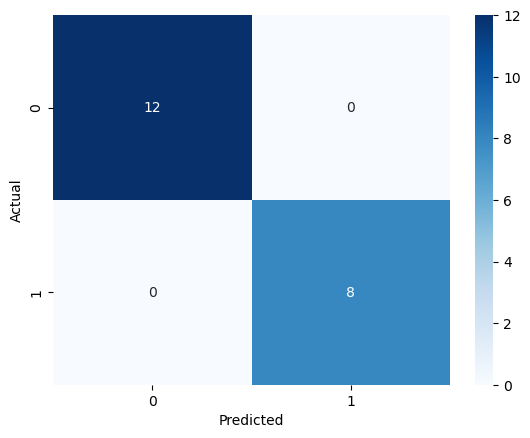

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[iris.target != 2]  
y = iris.target[iris.target != 2]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

**4.Develop a Python code for implementing the Naive Bayes algorithm with and example**

Accuracy: 1.00


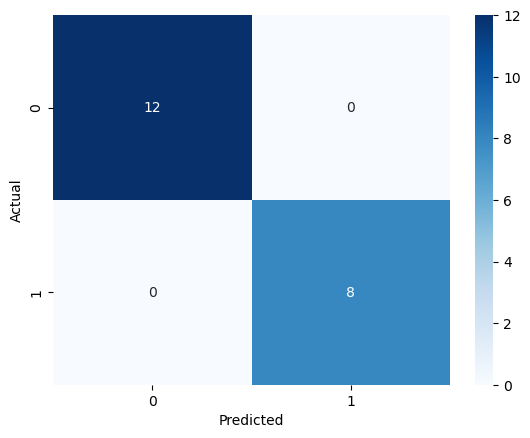

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

**5.Mark and his family are planning to move to a new city and are in the market for a new home. They have been searching online for homes in their desired area and have found several properties that meet their requirements. However, they are not sure about the prices of these homes and want to get a rough estimate before making an offer.How will  you help Mark to buy  a new house.**
a)	Read the house  Data set using the Pandas module

(b) Print the 1st five rows. 

(b)	Basic statistical computations on the data set or distribution of data 

(c) Print the columns and their data types 

(d) Detects null values in the dataset. If there is any null values replaced it with mode value 

(e) Explore the data set using   heatmap 

(f) Split the data in to test and train 

(g) Predict the price of a house


    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900         3       1.00         1180      5650       1           0   
1  538000         3       2.25         2570      7242       2           0   
2  180000         2       1.00          770     10000       1           0   
3  604000         4       3.00         1960      5000       1           0   
4  510000         3       2.00         1680      8080       1           0   

   view  condition  grade  yr_built  yr_renovated  zipcode      lat     long  
0     0          3      7      1955             0    98178  47.5112 -122.257  
1     0          3      7      1951          1991    98125  47.7210 -122.319  
2     0          3      6      1933             0    98028  47.7379 -122.233  
3     0          5      7      1965             0    98136  47.5208 -122.393  
4     0          3      8      1987             0    98074  47.6168 -122.045  
              price   bedrooms  bathrooms  sqft_living       sq

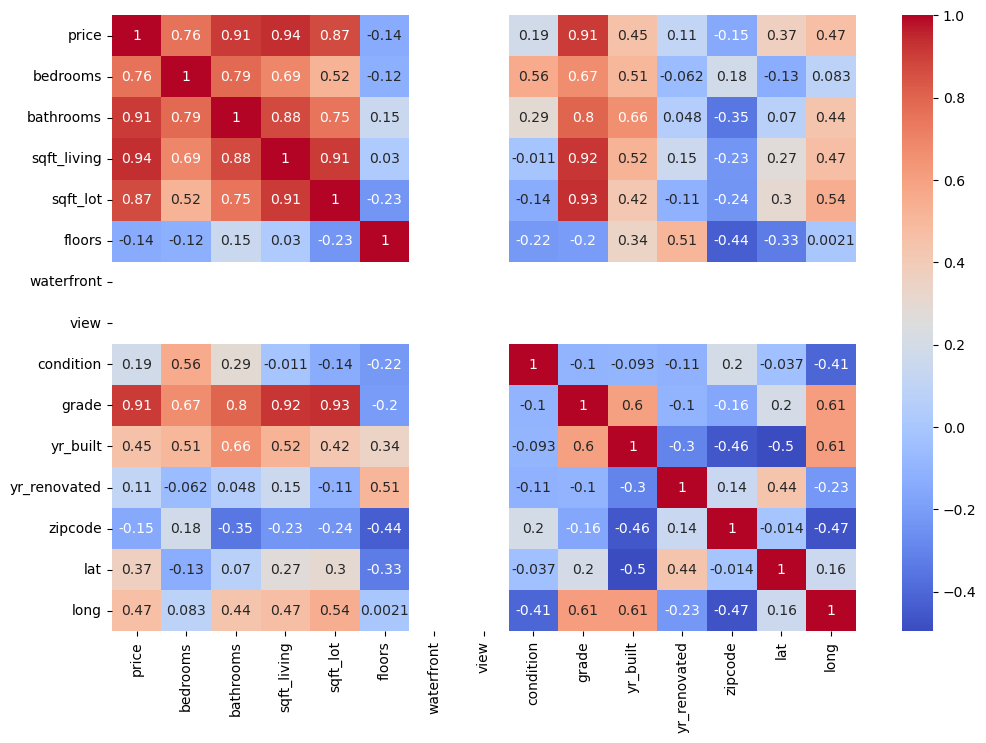

Mean Squared Error: 53320251249.22908
R^2 Score: -1.2409999237899316
Predicted price for the example house: 219409.96864984557


/Users/sunilshurajnthiyanandan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# a) Read the house dataset using the Pandas module and print the first five rows
data = pd.read_csv('/Users/sunilshurajnthiyanandan/Documents/sunil_clg/machine_Learning/Data/houseData.csv')
print(data.head())

# b) Basic statistical computations on the dataset and distribution of data
print(data.describe())

# c) Print the columns and their data types
print(data.dtypes)

# d) Detect null values in the dataset and replace them with the mode value
if data.isnull().sum().any():
    for column in data.columns:
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)

# e) Explore the dataset using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# f) Split the data into test and train
X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g) Predict the price of a house
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Example prediction
example_house = X_test.iloc[0].values.reshape(1, -1)
predicted_price = model.predict(example_house)
print(f'Predicted price for the example house: {predicted_price[0]}')

**6.	For a given set of training data examples stored in a .CSV file, implement and demonstrate the Candidate-Elimination algorithm to output a description of the set of all hypotheses consistent with the training examples.**

Example	Shape	Size	Color	Surface	Thickness	Target Concept

1	Circular	Large	Light	Smooth	Thick	Malignant (+)

2	Circular	Large	Light	Irregular	Thick	Malignant (+)

3	Oval	Large	Dark	Smooth	Thin	Benign (-)

4	Oval	Large	Light	Irregular	Thick	Malignant (+)



In [6]:
import pandas as pd
import numpy as np

data = pd.DataFrame({
    'Example': [1, 2, 3, 4],
    'Shape': ['Circular', 'Circular', 'Oval', 'Oval'],
    'Size': ['Large', 'Large', 'Large', 'Large'],
    'Color': ['Light', 'Light', 'Dark', 'Light'],
    'Surface': ['Smooth', 'Irregular', 'Smooth', 'Irregular'],
    'Thickness': ['Thick', 'Thick', 'Thin', 'Thick'],
    'Target_Concept': ['Malignant', 'Malignant', 'Benign', 'Malignant']
})

features = data.columns[1:-1]
target = data.columns[-1]

S = ['0'] * len(features)
G = [['?'] * len(features)]

def more_general(h1, h2):
    return all(x == '?' or x == y for x, y in zip(h1, h2))

def generalize_S(h, x):
    for i in range(len(h)):
        if h[i] == '0':
            h[i] = x[i]
        elif h[i] != x[i]:
            h[i] = '?'
    return h

def specialize_G(h, x):
    specializations = []
    for i in range(len(h)):
        if h[i] == '?':
            for value in np.unique(data.iloc[:, i+1]):
                if value != x[i]:
                    new_h = h.copy()
                    new_h[i] = value
                    specializations.append(new_h)
        elif h[i] != x[i]:
            new_h = h.copy()
            new_h[i] = '?'
            specializations.append(new_h)
    return specializations

S_hypotheses = [S]
G_hypotheses = G

for i, row in data.iterrows():
    x = row[1:-1]
    if row[target] == 'Malignant':  # Positive example
        S_hypotheses = [generalize_S(s, x) for s in S_hypotheses]
        G_hypotheses = [g for g in G_hypotheses if more_general(g, S_hypotheses[0])]
    else:  # Negative example
        G_hypotheses = [specialize_G(g, x) for g in G_hypotheses]
        G_hypotheses = [hypo for sublist in G_hypotheses for hypo in sublist]  # Flatten the list

print(f'Most Specific Hypotheses (S): {S_hypotheses}')
print(f'Most General Hypotheses (G): {G_hypotheses}')

Most Specific Hypotheses (S): [['?', 'Large', 'Light', '?', 'Thick']]
Most General Hypotheses (G): [['?', '?', 'Light', '?', '?'], ['?', '?', '?', '?', 'Thick']]


**7.Develop a Python code for implementing Linear regression and show its performance**

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

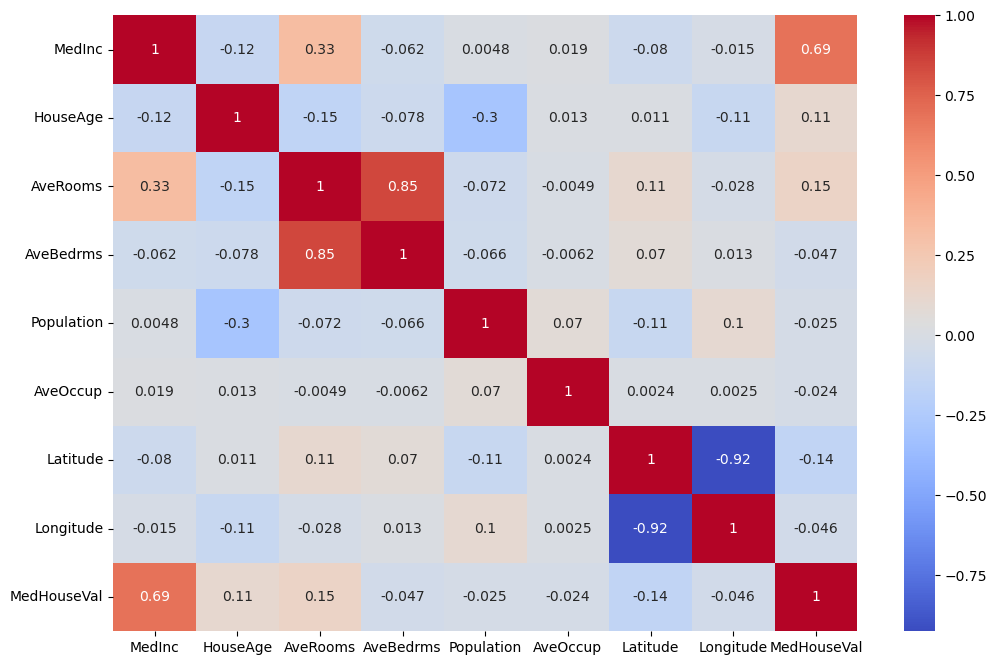

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


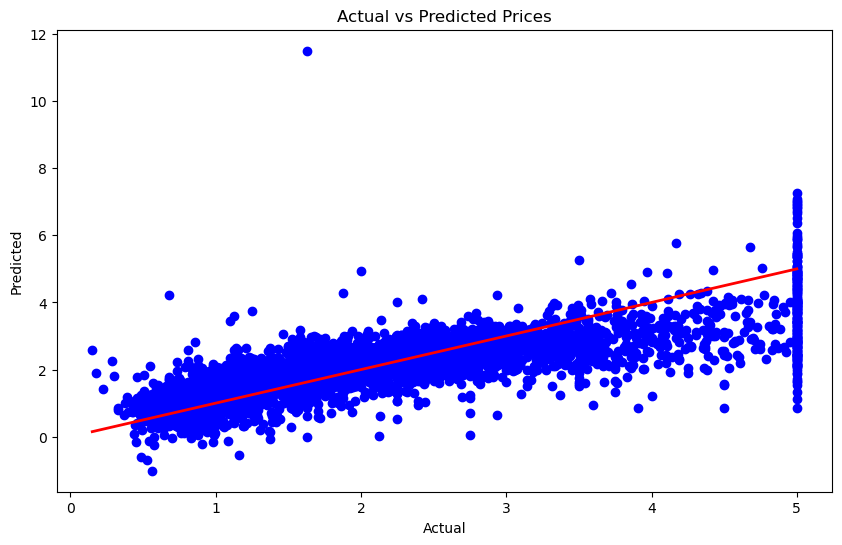

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target

print(data.head())

print(data.describe())

print(data.dtypes)

print(data.isnull().sum())

plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

**8.Develop a Python code for implementing the EM algorithm with an example**

In [8]:
import numpy as np

np.random.seed(0)
data = np.random.normal(5, 2, 1000).tolist() + np.random.normal(15, 5, 1000).tolist()
data = np.array(data)

def initialize_params():
    pi = 0.5
    mu1, mu2 = np.random.choice(data, 2)
    sigma1, sigma2 = np.std(data), np.std(data)
    return pi, mu1, mu2, sigma1, sigma2

def e_step(data, pi, mu1, mu2, sigma1, sigma2):
    gamma1 = pi * np.exp(-(data - mu1) ** 2 / (2 * sigma1 ** 2)) / np.sqrt(2 * np.pi * sigma1 ** 2)
    gamma2 = (1 - pi) * np.exp(-(data - mu2) ** 2 / (2 * sigma2 ** 2)) / np.sqrt(2 * np.pi * sigma2 ** 2)
    gamma_sum = gamma1 + gamma2
    gamma1 /= gamma_sum
    gamma2 /= gamma_sum
    return gamma1, gamma2

def m_step(data, gamma1, gamma2):
    pi = np.mean(gamma1)
    mu1 = np.sum(gamma1 * data) / np.sum(gamma1)
    mu2 = np.sum(gamma2 * data) / np.sum(gamma2)
    sigma1 = np.sqrt(np.sum(gamma1 * (data - mu1) ** 2) / np.sum(gamma1))
    sigma2 = np.sqrt(np.sum(gamma2 * (data - mu2) ** 2) / np.sum(gamma2))
    return pi, mu1, mu2, sigma1, sigma2

def em_algorithm(data, max_iter=100):
    pi, mu1, mu2, sigma1, sigma2 = initialize_params()
    for _ in range(max_iter):
        gamma1, gamma2 = e_step(data, pi, mu1, mu2, sigma1, sigma2)
        pi, mu1, mu2, sigma1, sigma2 = m_step(data, gamma1, gamma2)
    return pi, mu1, mu2, sigma1, sigma2

pi, mu1, mu2, sigma1, sigma2 = em_algorithm(data)
print(f'pi: {pi}')
print(f'mu1: {mu1}, sigma1: {sigma1}')
print(f'mu2: {mu2}, sigma2: {sigma2}')

pi: 0.4966945352655003
mu1: 4.9074656054315025, sigma1: 1.955237663004119
mu2: 15.003362419405446, sigma2: 4.900110611122791
